# Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. 

Here we are provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. On the basis of the given data we have to predict the price of the flight ticket. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

Importing intial librarires

In [2]:
flight_train = pd.read_excel('Data_Train.xlsx')
flight_test = pd.read_excel('Test_set.xlsx')
flight_sample = pd.read_excel('Sample_submission.xlsx')

We have imported the dataset. We got the dataset in excel format so used read_excel to fetch the data

In [3]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


We have impooerted the dataset and created an instance for the same. We can see that we have to predict the prices which a numerical column. Hence, we have to build a regressor model. 

In [4]:
print("Dataset Shape is:",flight_train.shape)
print("Numbers of rows in our dataset are:",flight_train.shape[0])
print("Numbers of columns in our dataset are:",flight_train.shape[1])

Dataset Shape is: (10683, 11)
Numbers of rows in our dataset are: 10683
Numbers of columns in our dataset are: 11


Shape of our dataset

In [5]:
flight_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


We can see that we 12 columns with 10683 non null values, means no null values in the dataset. column 1-9 is object and rest are integer. Our target is to predict the price which is a continous int value. Hence we will be building a regressor problem here. 

In [6]:
print("Checking for NUll Values in the Dataset.\n")
print(flight_train.isnull().sum())

Checking for NUll Values in the Dataset.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


Checking null values in the dataset we can check that there 2 columns with 1 null values each

In [7]:
flight_train.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


Above is the description of our dataset. WHich shows the mean, meadian, standard deviation of each column. Most of the columns are object type hence showing NaN. 

In [8]:
flight_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

All columns are of type object. Target variable is of int type. 

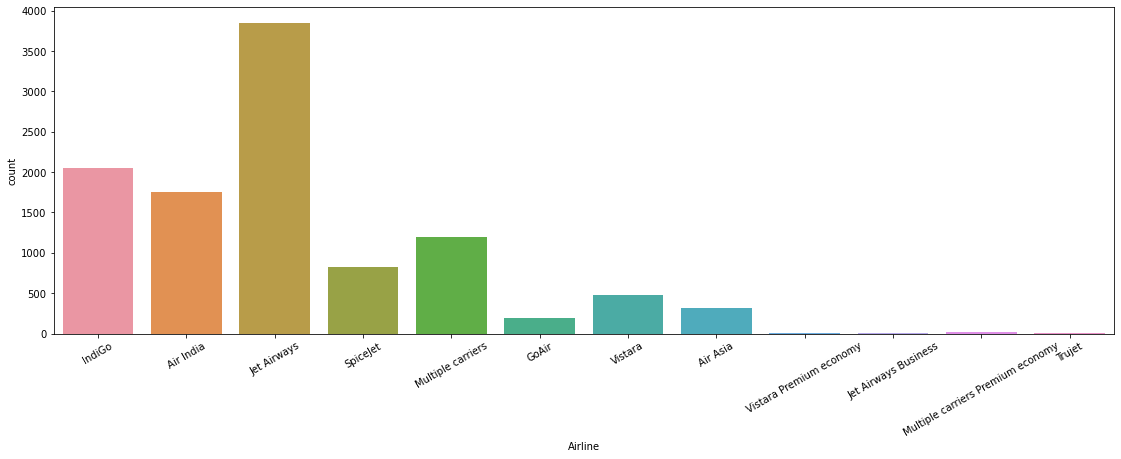

In [9]:
plt.figure(figsize=(19,6))
plt.xticks(rotation=30)
sns.countplot(flight_train['Airline'])
plt.show()

Above is the list of airlines in graphical form. We can see that we a maximum number of flights of jet airways. We can say that max customers prefer jet airways. 

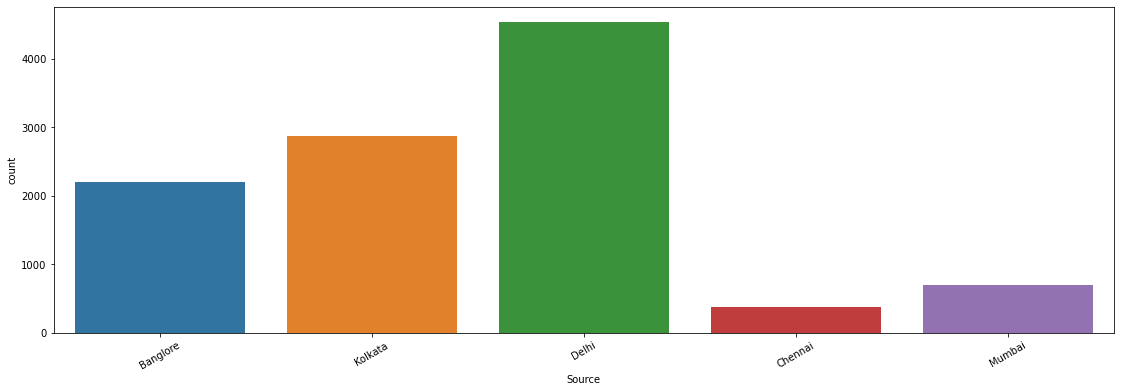

In [10]:
plt.figure(figsize=(19,6))
plt.xticks(rotation=30)
sns.countplot(flight_train['Source'])
plt.show()

Above is graphical representation of the cities from where the flight was boarded. We can see that maximum flights were barded frm delhi. 

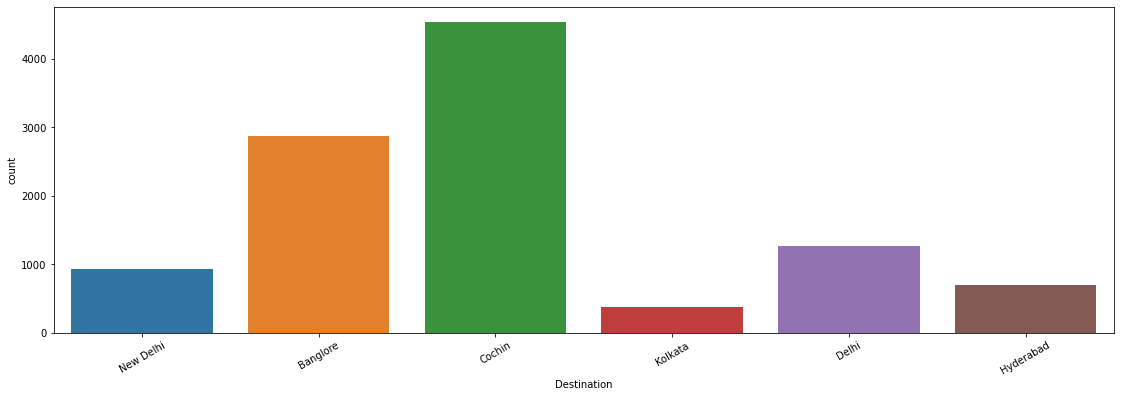

In [11]:
plt.figure(figsize=(19,6))
plt.xticks(rotation=30)
sns.countplot(flight_train['Destination'])
plt.show()

Above we can see that maximum flights were coarded to cochin. We can say that prices from delhi to cochin will be higher. 

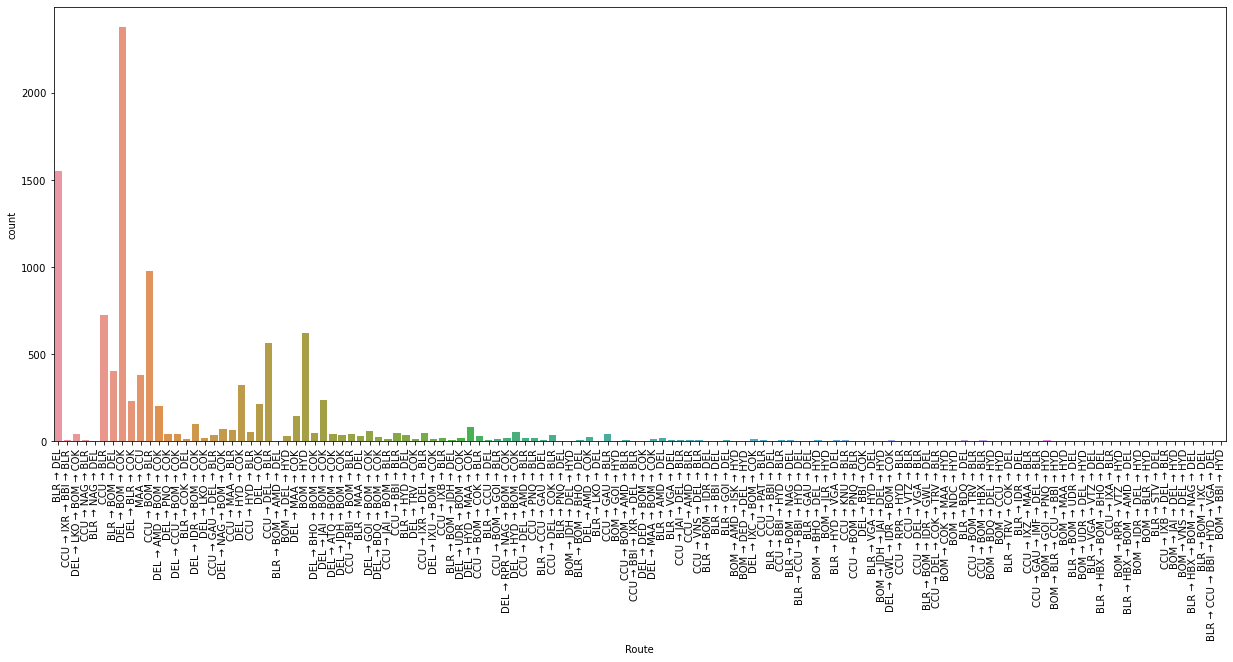

In [12]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=90)
sns.countplot(flight_train['Route'])
plt.show()

Above is graphical representation of the counts of all the routes. We can see here as well that Delhi to cochin via mumbai is the busiest route.  

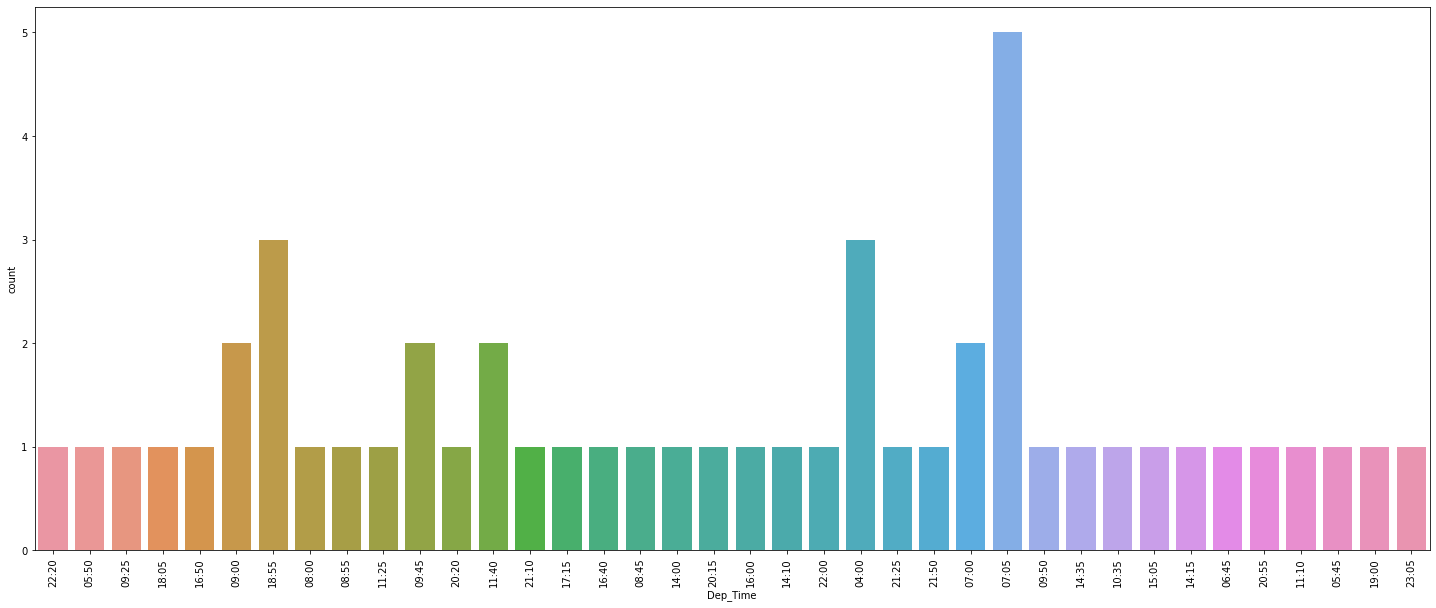

In [13]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
sns.countplot(flight_train['Dep_Time'].head(50))
plt.show()

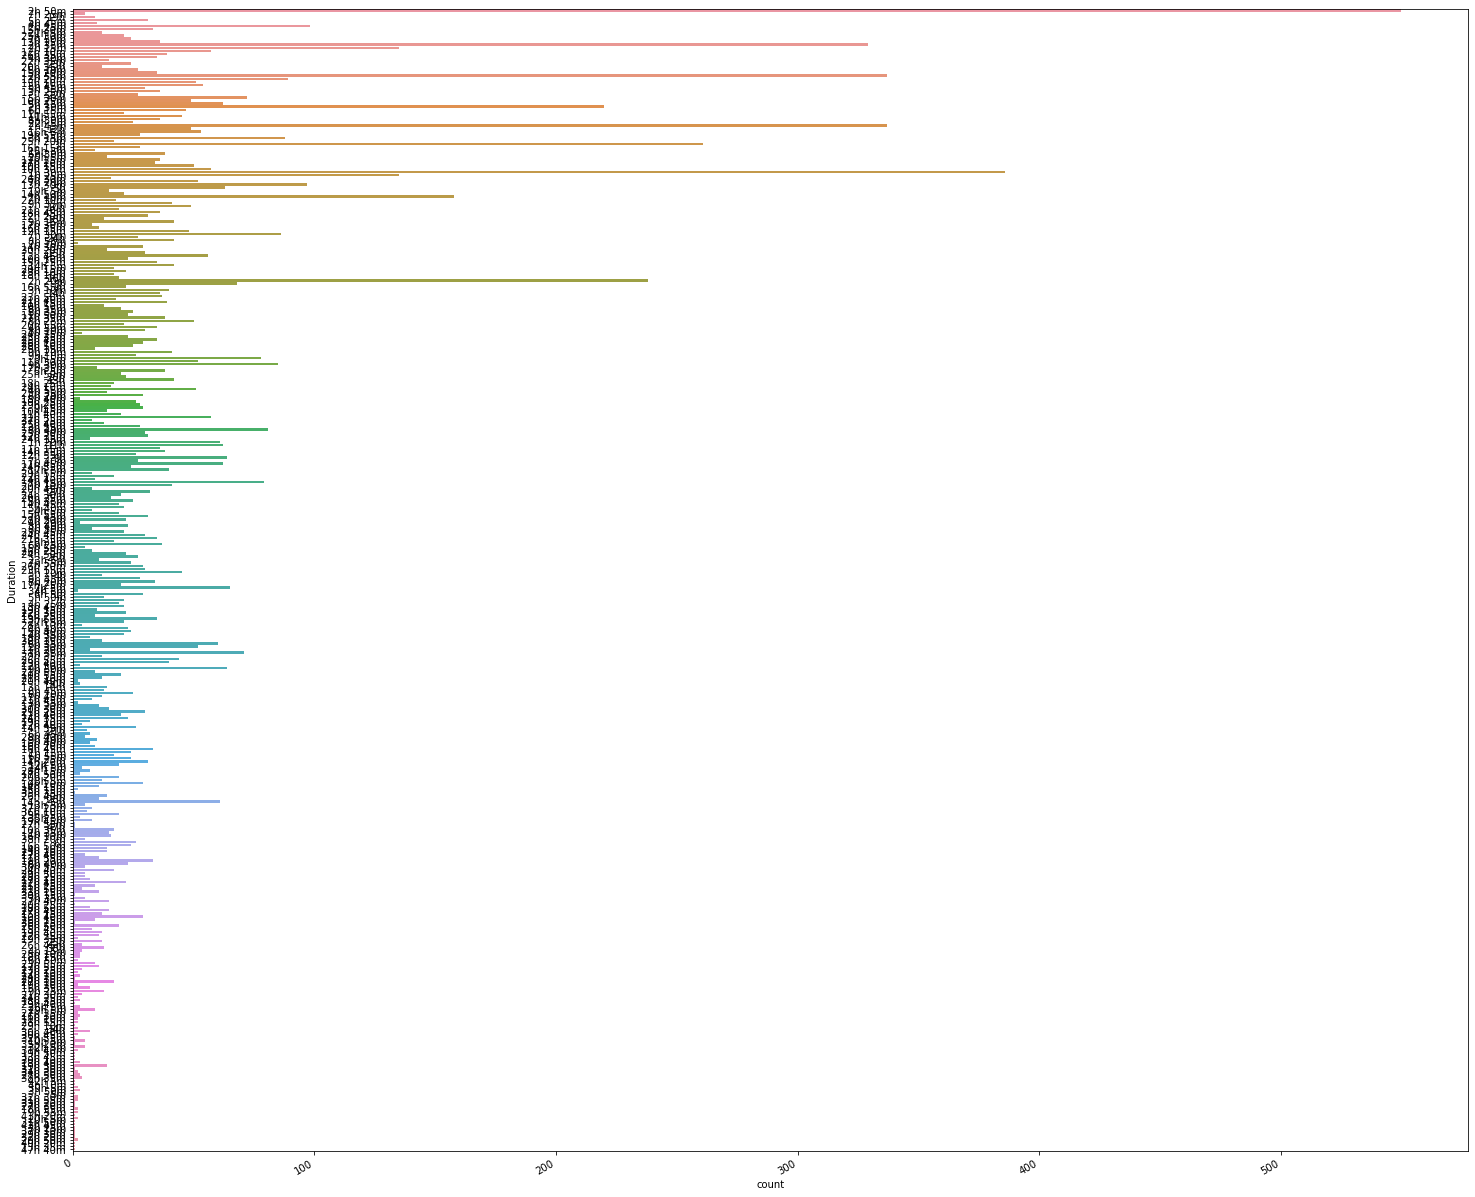

In [14]:
plt.figure(figsize=(25,21))
plt.xticks(rotation=30,ha="right")
sns.countplot(y = flight_train['Duration'])
plt.show()

Here we can see that we have maximum flight duration for 2h 50min in top 50 entries of this column

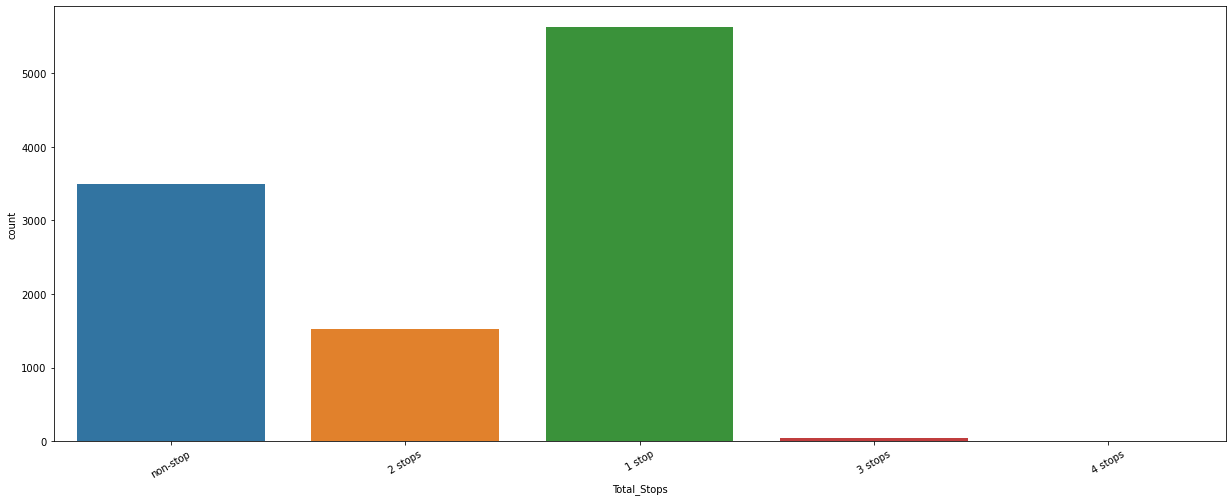

In [15]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.countplot(flight_train['Total_Stops'])
plt.show()

Here we can see that we have maximum flights that are having one stop between source and destination. After we have maximum no of flights that are non stop and minimum number with 2 stops and 3 stops. None flights having 4 flights. 

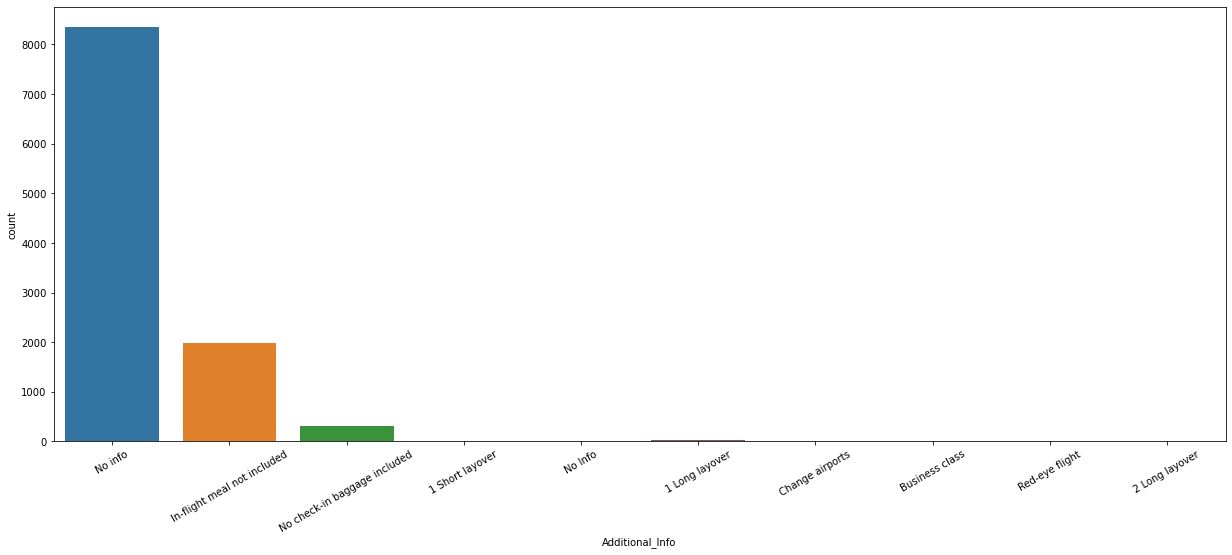

In [16]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.countplot(flight_train['Additional_Info'])
plt.show()

We conclude that this column doesnot have any iuseful information for us. As most of count is for No information

In [17]:
flight_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

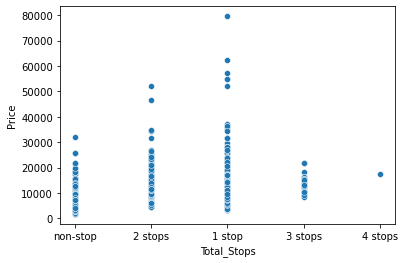

In [18]:
sns.scatterplot(x = 'Total_Stops' , y = 'Price' , data = flight_train)
plt.show()

We can see that we have maximum ticket price for the flight having 1 stop and minimum fair for the flights having 4 stops. We can say that increase in stop lead to increased price as per the dataset. Also,we can check that there are few outliers as well. 

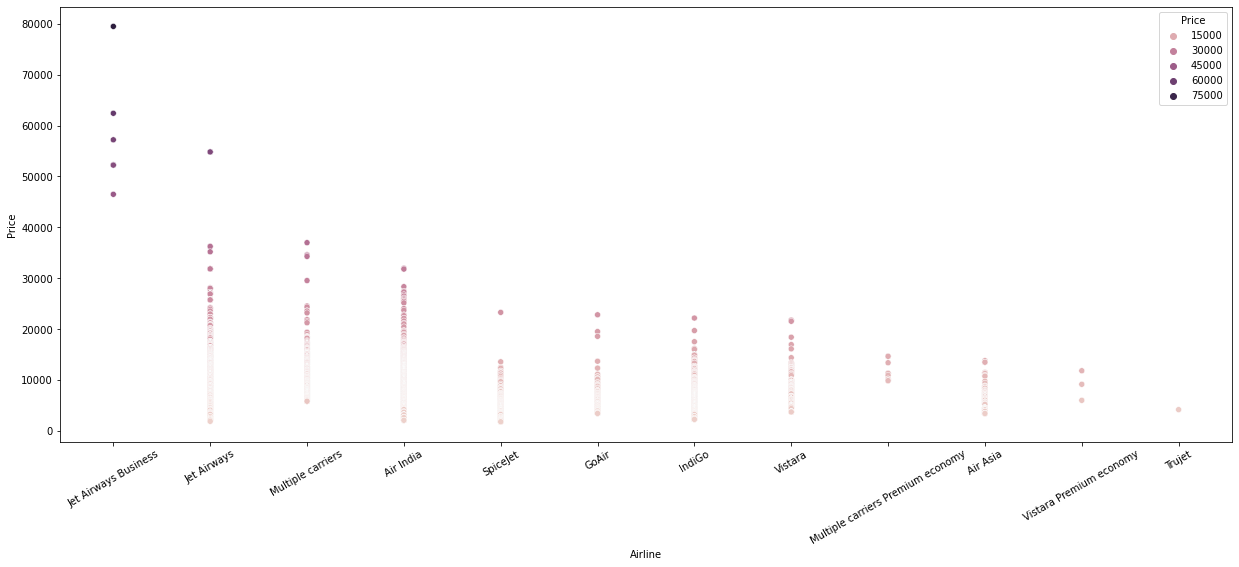

In [19]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.scatterplot(x = 'Airline' , y = 'Price' ,data=flight_train.sort_values('Price',ascending=False),hue ='Price')
plt.show()

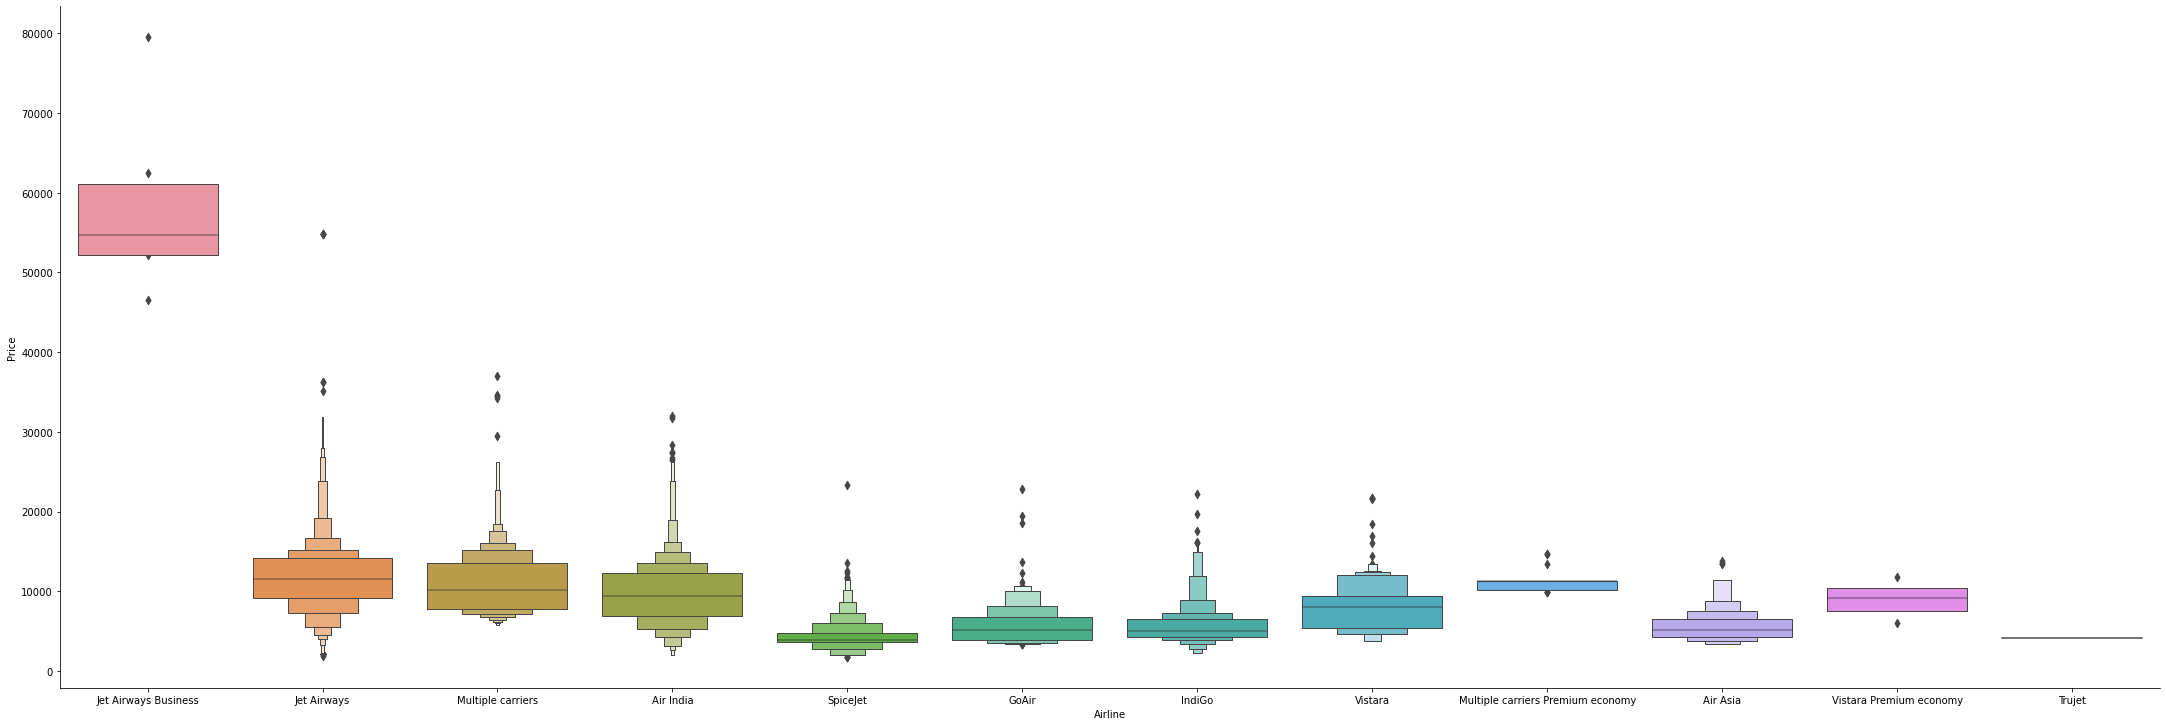

In [20]:
sns.catplot(y='Price',x='Airline',data=flight_train.sort_values('Price',ascending=False),kind='boxen',height=10,aspect=3)
plt.show()

Above we can see that jet airways business is having highest price. We mae a scatter plot and catplot for the same information. Also, few outliers could be there 

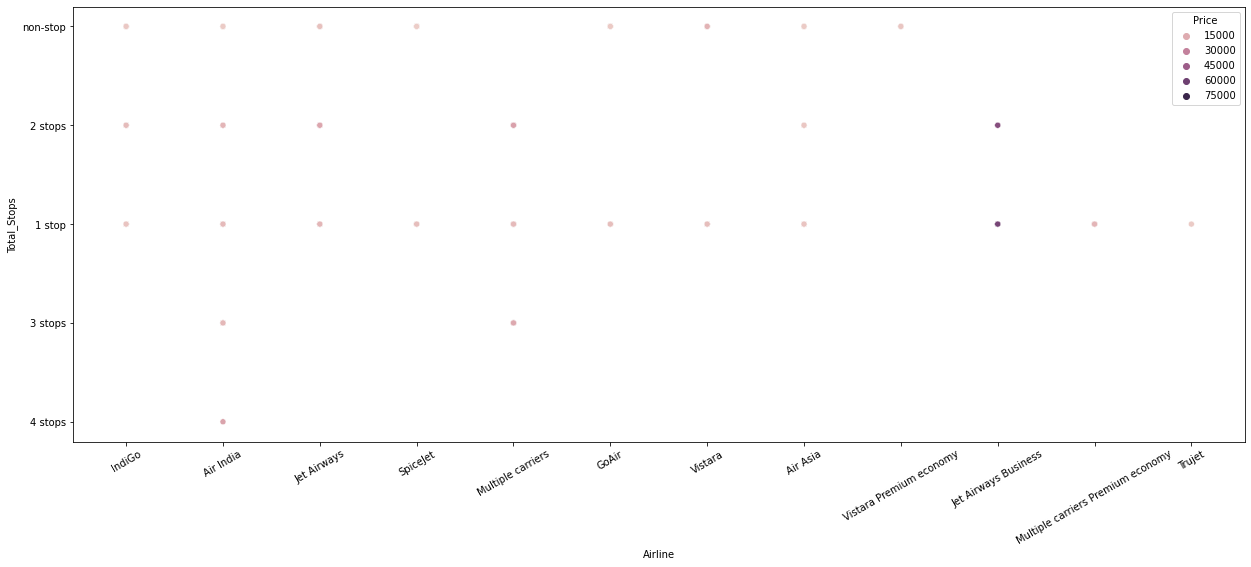

In [21]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.scatterplot(x = 'Airline' , y = 'Total_Stops' , data = flight_train, hue='Price')
plt.show()

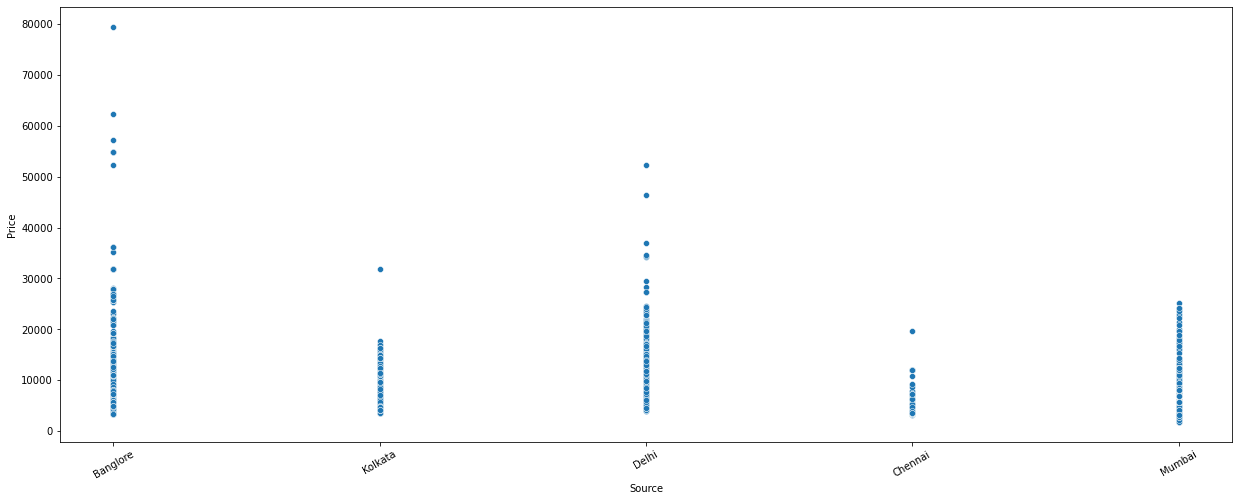

In [22]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.scatterplot(x = 'Source' , y = 'Price' , data = flight_train)
plt.show()

We can say that we have maximum tickers from bangalore to other cities with max fare. Some outliers are present

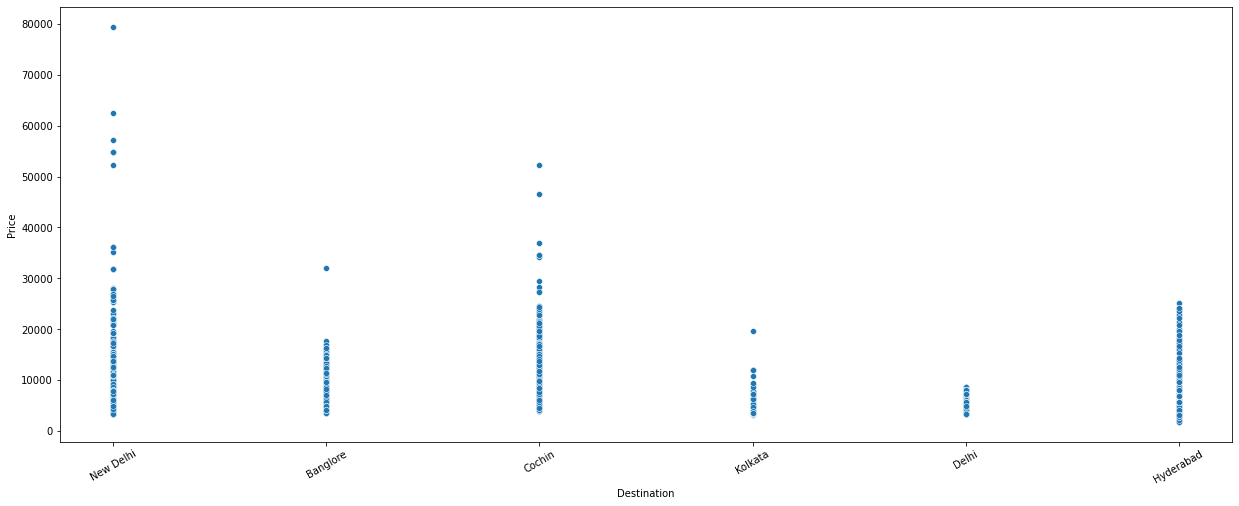

In [23]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.scatterplot(x = 'Destination' , y = 'Price' , data = flight_train)
plt.show()

We can say that maximum and costliest tickets are booked to Delhi and then to cochin. 

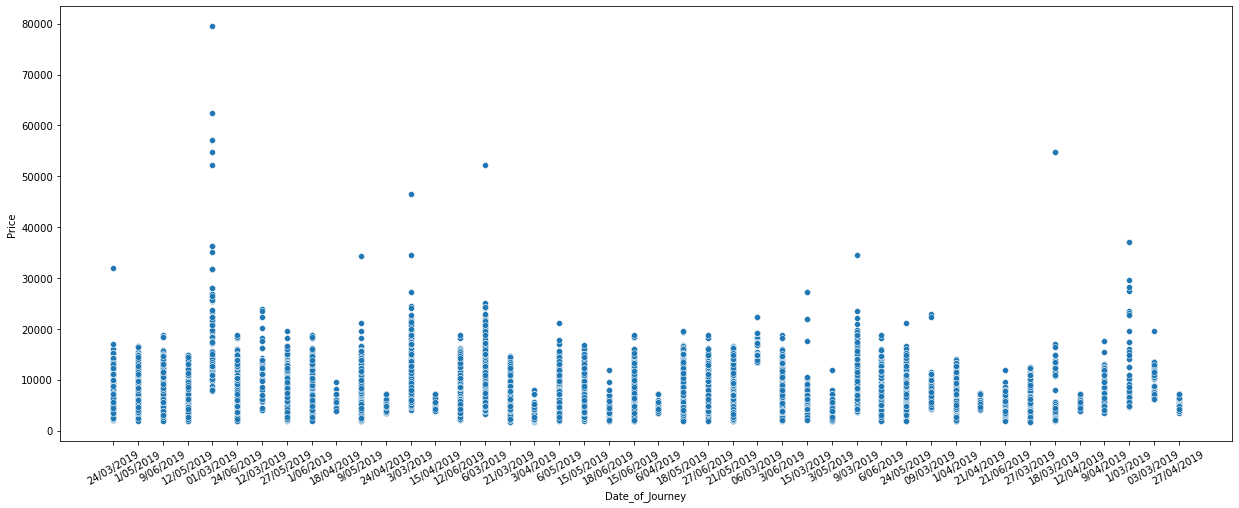

In [24]:
plt.figure(figsize=(21,8))
plt.xticks(rotation=30)
sns.scatterplot(x = 'Date_of_Journey' , y = 'Price' , data = flight_train)
plt.show()

Date of journey is different at different dates and prices vary with the same. Hence we can say that Date_of_Journey effects the prices of the flights. 

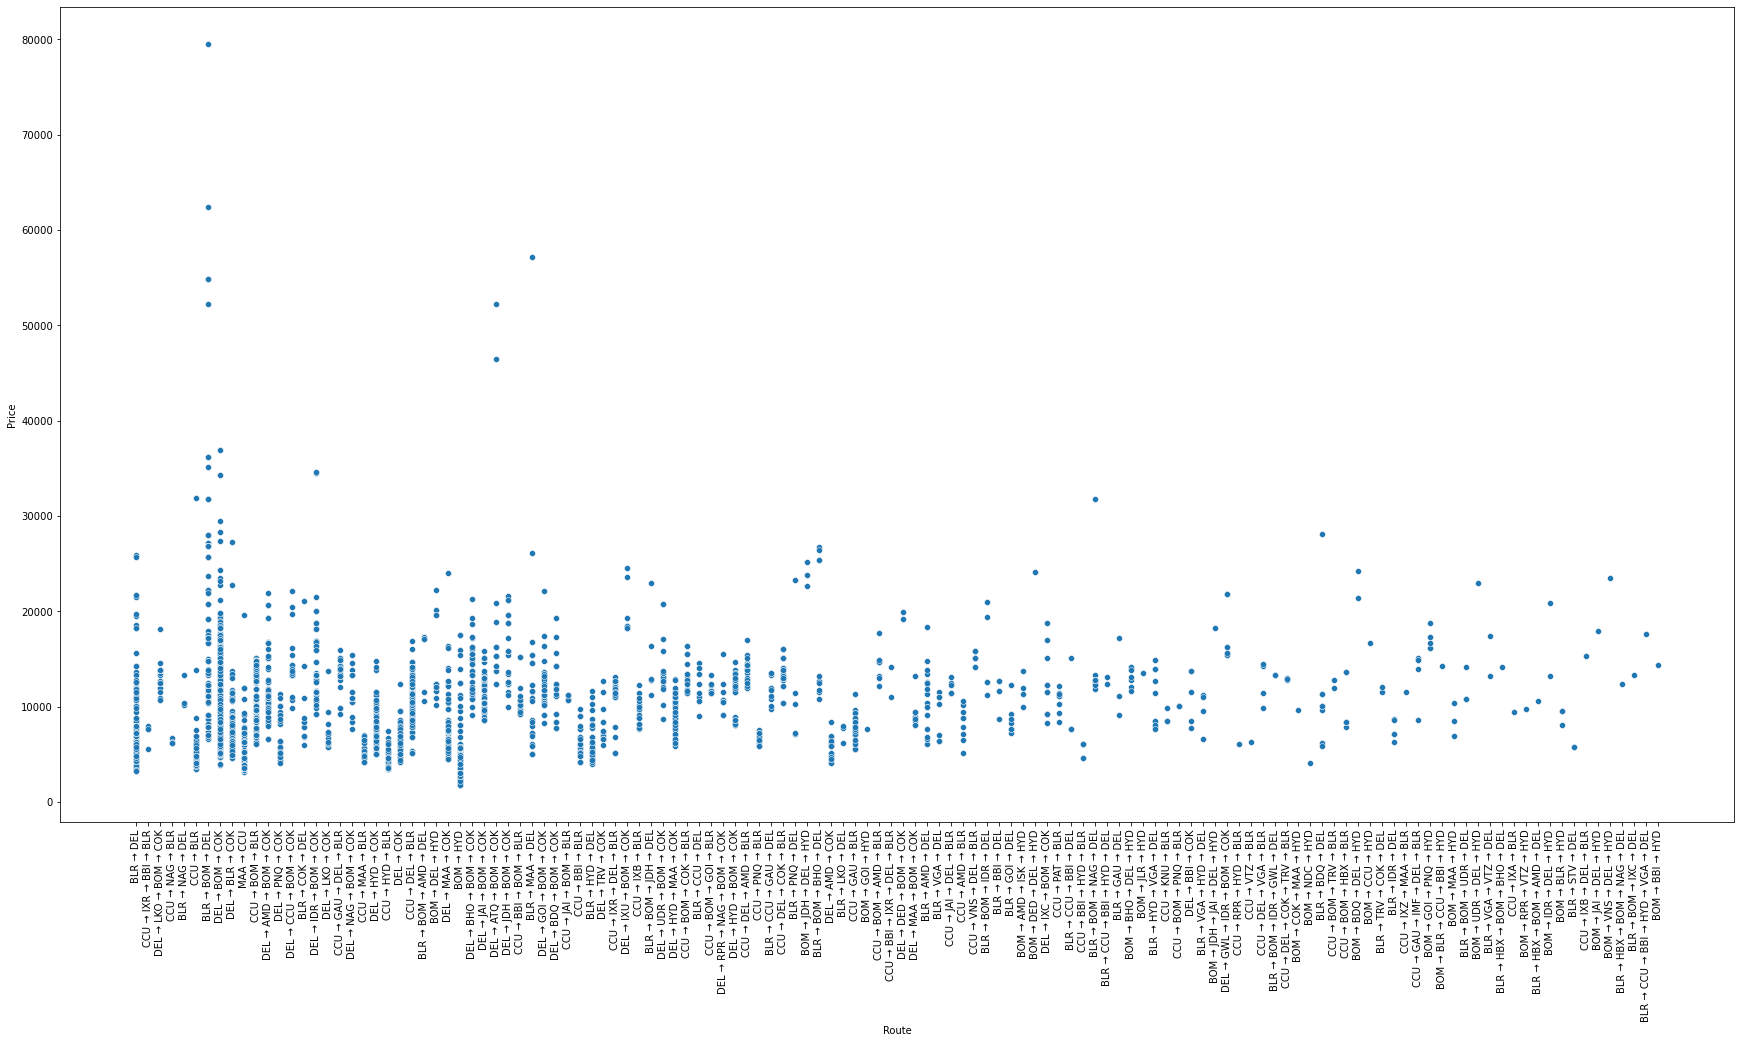

In [25]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
sns.scatterplot(x = 'Route' , y = 'Price' , data = flight_train)
plt.show()

Above we can see that DEL-BOM-COK route is most busy and costliest. 

# Treating Null Values

In [26]:
flight_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We can check that we have some null values in our dataset. 

In [27]:
flight_train['Route'].dropna(inplace=True)
flight_train['Total_Stops'].dropna(inplace=True)

We treat the null values by dropping them 

In [28]:
print("Dataset New Shape is:",flight_train.shape)
print("Numbers of rows in our dataset are:",flight_train.shape[0])
print("Numbers of columns in our dataset are:",flight_train.shape[1])

Dataset New Shape is: (10683, 11)
Numbers of rows in our dataset are: 10683
Numbers of columns in our dataset are: 11


No major changes occurred in the dataset

# Checking outliers

Price    AxesSubplot(0.125,0.71587;0.0945122x0.16413)
dtype: object

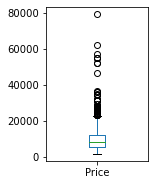

In [29]:
flight_train.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))

All the dataset columns are objects we can say we don't have any outliers. 

# CHecking Skewness

In [30]:
col = flight_train.columns

Airline is Object datatype

Date_of_Journey is Object datatype

Source is Object datatype

Destination is Object datatype

Route is Object datatype

Dep_Time is Object datatype

Arrival_Time is Object datatype

Duration is Object datatype

Total_Stops is Object datatype

Additional_Info is Object datatype

1.8125523782189141
Price Column is having skewness


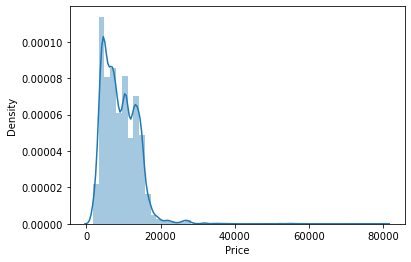

In [31]:
skew_col = []
for i in col:
    if flight_train[i].dtype == 'float64' or flight_train[i].dtype =='int64':
        if (flight_train[i].skew() > 0.55 or flight_train[i].skew() < -0.55): 
            print(flight_train[i].skew())
            print(i,"Column is having skewness")
            skew_col.append(i)
        else:
            print(flight_train[i].skew())
            print("No skewness is present in",i)
        plt.figure()
        sns.distplot(flight_train[i])
        plt.show()
    else:
        print(i,"is Object datatype\n")

# Feature Engineering

In [32]:
flight_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Above we can see that most of the columns are in object form. But we need date, departure time, arrival time and duration in correct format as all these columns represents the Date and time and also reuired for prediction. Hence proceeding with the same. We will be using pandas date time for this. 

In [33]:
flight_train['Day_of_journey'] = pd.to_datetime(flight_train['Date_of_Journey'], format="%d/%m/%Y").dt.day
flight_train['month_of_journey'] = pd.to_datetime(flight_train["Date_of_Journey"], format="%d/%m/%Y").dt.month

We can check that we successfully extracted day and month of journey from the Date_of_Journey and it is in reuired format now. So, we can now drop Date_of_Journey column from our dataset. We will proceed with similar functions on dep time and arrival time as well. 

In [34]:
flight_train['dep_time_hour'] = pd.to_datetime(flight_train["Dep_Time"]).dt.hour
flight_train['dep_time_min'] = pd.to_datetime(flight_train["Dep_Time"]).dt.minute

Here we were having Dep_Time in HH:MM format so we extracted HH and MM from the same and will drop the main column from dataset later. Will proceed with the same for arrival time as well. 

In [35]:
flight_train['arr_time_hour'] = pd.to_datetime(flight_train["Arrival_Time"]).dt.hour
flight_train['arr_time_min'] = pd.to_datetime(flight_train["Arrival_Time"]).dt.minute

We have now separeated the arrival time as well. Will proceed the same with Duration column as well. 

In [36]:
dura = list(flight_train["Duration"])
for i in range(len(dura)):
    if len(dura[i].split()) != 2:
        if "h" in dura[i]:
            dura[i] = dura[i].strip() + " 0m"
        else:
            dura[i] =  "0h " + dura[i]

We have moved the column into a list named Dur inorder to split the data. As the columns contains the data in form of string. So, we ran a loop to length of duta and in if we added a condition if the splitted length not equal to 2 means carrying only 1 attribute minutes will added else hours will be added. 

In [37]:
duration_hours = []
duration_min= []

We created two emtly list to save hours and minutes. 

In [38]:
for i in range(len(dura)):
    duration_hours.append(int(dura[i].split(sep='h')[0]))
    duration_min.append(int(dura[i].split(sep='m')[0].split()[-1]))

In [39]:
flight_train["Duration Hours"] = duration_hours
flight_train["Duration Minutes"] = duration_min

We are adding the new columns to our dataset which contains hours from duration column and minutes from the duration column in two different columns. 

In [40]:
flight_train = flight_train.drop('Date_of_Journey',axis=1)
flight_train = flight_train.drop('Dep_Time',axis=1)
flight_train = flight_train.drop('Arrival_Time',axis=1)
flight_train = flight_train.drop('Duration',axis=1)

As we have extracted required information from all these 4 columns so we have dropped the origional column from our dataset. 

# Encoding

In [41]:
airline = flight_train["Airline"]
airline = pd.get_dummies(airline,drop_first=True)

destination = flight_train[["Destination"]]
destination = pd.get_dummies(destination,drop_first=True)

source = flight_train[["Source"]]
source = pd.get_dummies(source,drop_first=True)

In [42]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
flight_train['Total_Stops'] = label.fit_transform(flight_train['Total_Stops'])

Here we use label encoder techniqiue to encode the data as this columns has ordinal data. 

In [43]:
flight_train = flight_train.drop('Airline',axis=1)
flight_train = flight_train.drop('Destination',axis=1)
flight_train = flight_train.drop('Source',axis=1)
flight_train = flight_train.drop('Route',axis=1)
flight_train = flight_train.drop('Additional_Info',axis=1)

In [44]:
flight_data = pd.concat([flight_train,airline,source,destination],axis=1)

In [45]:
flight_data.head()

,Total_Stops,Price,Day_of_journey,month_of_journey,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration Hours,Duration Minutes,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


<function matplotlib.pyplot.show(close=None, block=None)>

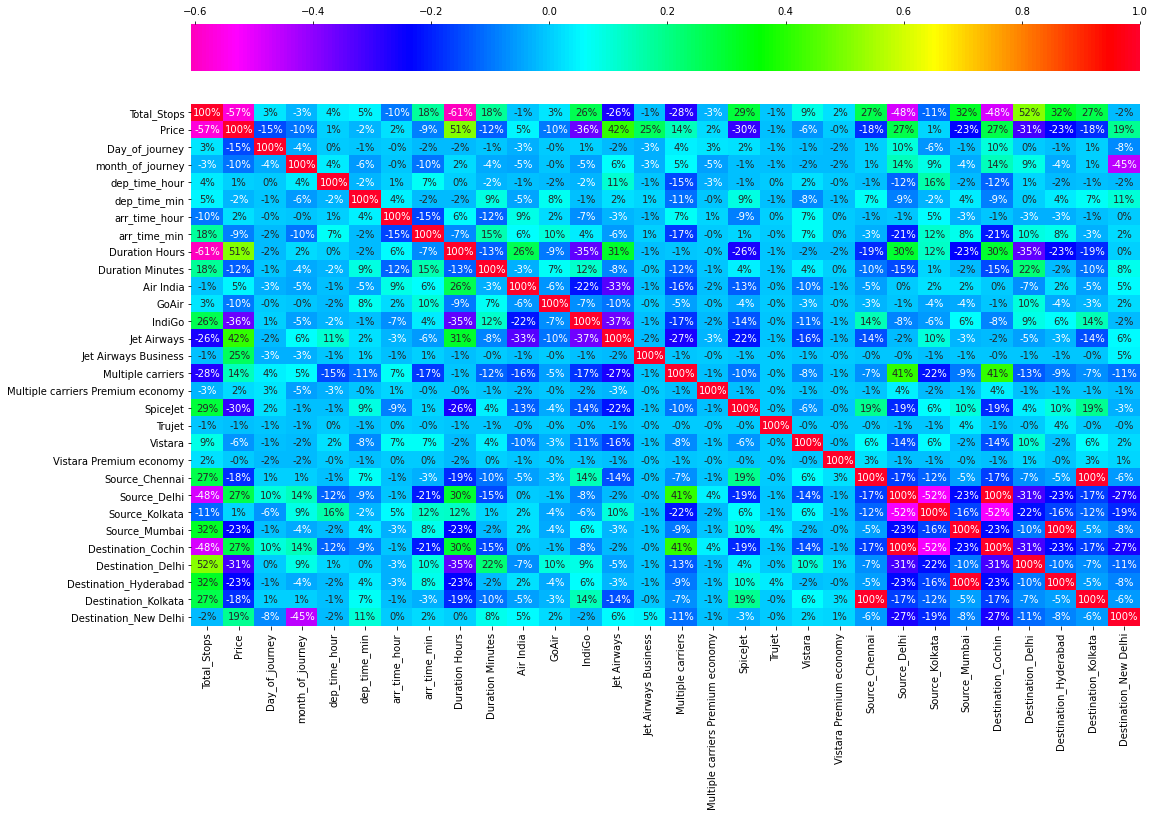

In [46]:
plt.figure(figsize=(17,12))
sns.heatmap(flight_data.corr(),annot=True, cmap = 'gist_rainbow_r',fmt='.0%',cbar_kws = dict(use_gridspec=False,location="top"))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

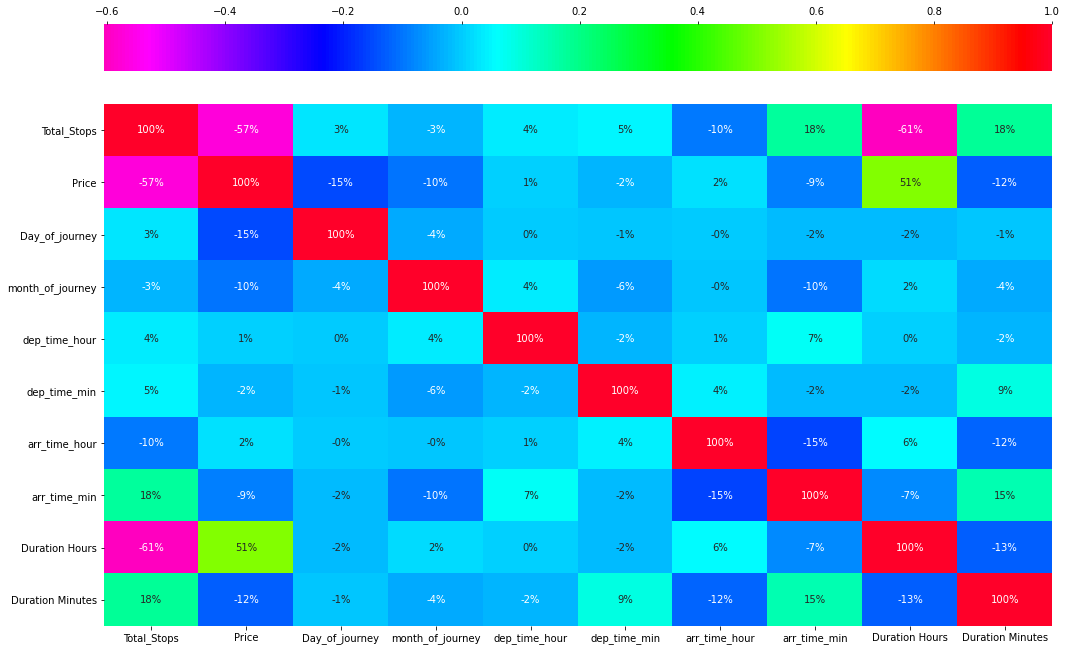

In [47]:
plt.figure(figsize=(17,12))
sns.heatmap(flight_train.corr(),annot=True, cmap = 'gist_rainbow_r',fmt='.0%',cbar_kws = dict(use_gridspec=False,location="top"))
plt.show

We have created a heatmap to check the corelation between the columns in the train data.

1. Total stop column is highly corelated with arrival time minutes, Duration minutes, spicejet airways, chennai,mumbai,delhi, hyderabad, kolkata location, 
2. Also, we can see that we are haviung some multicollinearity here like Delhi, cochin is highly corelated with duration hours and multiple carriers. 
3. source Delhi and destonation cochin and source mumbai and destination hyderabad are very highly colralted. 
4. Source cHennai and destonation kolkata are very highly corelated with each other. 

6. Our target price is highly corelated with Duration hours, jet airways,jet airways business, Delhi and cochin. 


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Variables"] = x.columns
    vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1]) ]
    return (vif)

We created a function above that will take datset as input and will give us the columns with high vaiance inflation factor. 

In [49]:
calc_vif(flight_train)

,Variables,VIF Factor
0,Total_Stops,2.776988
1,Price,6.247566
2,Day_of_journey,3.274187
3,month_of_journey,10.380524
4,dep_time_hour,5.485732
5,dep_time_min,2.651107
6,arr_time_hour,4.414519
7,arr_time_min,3.305278
8,Duration Hours,4.077614
9,Duration Minutes,3.821313


In [50]:
flight_tr = flight_data.copy()
flight_tr.head()

,Total_Stops,Price,Day_of_journey,month_of_journey,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration Hours,Duration Minutes,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,1,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,0,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [51]:
x = flight_tr.drop('Price',axis=1)
x.head()

,Total_Stops,Day_of_journey,month_of_journey,dep_time_hour,dep_time_min,arr_time_hour,arr_time_min,Duration Hours,Duration Minutes,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,4,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,1,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
y = flight_tr['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

We separated the dataset into X and Y. X with independant variables and Y with delendant or target variable

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

We are using standard scaler so that our dataset could be in a same class as of now we can see there are some difference in classes. 

In [54]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor  
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

Importing train test split library to split the data and regressor algorithms to build a model. Also, importing r2 score and mean_squared_error,mean_absolute_error to check model performance. 

In [55]:
dtc = DecisionTreeRegressor()
lr = LinearRegression()
svr = SVR()
rnd = RandomForestRegressor()
knn = KNeighborsRegressor()

In [56]:
def predict_best_state(X):
    for i in range(0,200):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = i)
        X.fit(x_train,y_train)
        predict_train = X.predict(x_train)
        predict_test = X.predict(x_test)
        if round(r2_score(y_train,predict_train)*100,1) == round(r2_score(y_test,predict_test)*100,1):
            print("AT random state",i,"the",X,"model is performing good")

Creating a function to find a best random state for the model. 

In [57]:
predict_best_state(lr)

AT random state 1 the LinearRegression() model is performing good
AT random state 192 the LinearRegression() model is performing good


We find a best random state. Fitting and checking score to build a model. 

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 192)
lr.fit(x_train,y_train)
predict_lr = lr.predict(x_test)
print('Means absolute error for Linear Regression ', mean_absolute_error(y_test,predict_lr))
print('Means Squared Error for Linear Regression',mean_squared_error(y_test,predict_lr))
print('Root mean square for Linear Regression', np.sqrt(mean_squared_error(y_test,predict_lr)))

print('Model Score for Linear Regression ',r2_score(y_test,predict_lr))

Means absolute error for Linear Regression  2049.8291550313065
Means Squared Error for Linear Regression 7897980.234760543
Root mean square for Linear Regression 2810.334541431063
Model Score for Linear Regression  0.5898535854307392


In [59]:
predict_best_state(dtc)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 40)
lr.fit(x_train,y_train)
predict_dtc = dtc.predict(x_test)
print('Means absolute error for Decision Tree', mean_absolute_error(y_test,predict_dtc))
print('Means Squared Error for Decision Tree',mean_squared_error(y_test,predict_dtc))
print('Root mean square for  Decision Tree', np.sqrt(mean_squared_error(y_test,predict_dtc)))

print('Model Score for  Decision Tree',r2_score(y_test,predict_dtc))

Means absolute error for Decision Tree 499.0432693807519
Means Squared Error for Decision Tree 1529704.7816526282
Root mean square for  Decision Tree 1236.8123469842255
Model Score for  Decision Tree 0.9313843651036638


In [ ]:
predict_best_state(svr)

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.15, random_state = 40)
svr.fit(x_train,y_train)
predict_svr = svr.predict(x_test)
print('Means absolute error for SVR', mean_absolute_error(y_test,predict_svr))
print('Means Squared Error for SVR',mean_squared_error(y_test,predict_svr))
print('Root mean square for SVR', np.sqrt(mean_squared_error(y_test,predict_svr)))

print('Model Score for SVR',r2_score(y_test,predict_svr))

Means absolute error for SVR 3337.7380904030656
Means Squared Error for SVR 18734198.556828834
Root mean square for SVR 4328.302040850295
Model Score for SVR 0.08009871199037433


In [ ]:
predict_best_state(knn)

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 40)
knn.fit(x_train,y_train)
predict_knn = knn.predict(x_test)
print('Means absolute error for KNeighborsRegressor', mean_absolute_error(y_test,predict_knn))
print('Means Squared Error for KNeighborsRegressor',mean_squared_error(y_test,predict_knn))
print('Root mean square for KNeighborsRegressor', np.sqrt(mean_squared_error(y_test,predict_knn)))

print('Model Score for KNeighborsRegressor',r2_score(y_test,predict_knn))

Means absolute error for KNeighborsRegressor 1440.7972859148338
Means Squared Error for KNeighborsRegressor 5717969.757922322
Root mean square for KNeighborsRegressor 2391.22766752192
Model Score for KNeighborsRegressor 0.7435177493306782


In [ ]:
predict_best_state(rnd)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 40)
rnd.fit(x_train,y_train)
predict_rnd = rnd.predict(x_test)
print('Means absolute error for RandomForestRegressor', mean_absolute_error(y_test,predict_rnd))
print('Means Squared Error for RandomForestRegressor',mean_squared_error(y_test,predict_rnd))
print('Root mean square for RandomForestRegressor', np.sqrt(mean_squared_error(y_test,predict_rnd)))

print('Model Score for RandomForestRegressor',r2_score(y_test,predict_rnd))

Means absolute error for RandomForestRegressor 1179.478409511289
Means Squared Error for RandomForestRegressor 3972014.817673188
Root mean square for RandomForestRegressor 1992.9914243852602
Model Score for RandomForestRegressor 0.8218333878528786


From the above results we can check that decision tree is giving the highest results which is 93%. 

# Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score

In [67]:
score_dtc=cross_val_score(dtc,x,y,cv=5)
print('\n')
print("Cross validation Score for Decision Tree is",score_dtc)
print(score_dtc.mean())
print(score_dtc.std())
print('\n')
score_lr=cross_val_score(lr,x,y,cv=5)
print("Cross validation Score for Linear Regression is",score_lr)
print(score_lr.mean())
print(score_lr.std())
print('\n')
score_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation Score for SVR is",score_svr)
print(score_svr.mean())
print(score_svr.std())
print('\n')
score_rnd=cross_val_score(rnd,x,y,cv=5)
print("Cross validation Score for Random Forest Regressor is",score_rnd)
print(score_rnd.mean())
print(score_rnd.std())
print('\n')
score_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation Score for K neighnors is",score_knn)
print(score_knn.mean())
print(score_knn.std())
print('\n')



Cross validation Score for Decision Tree is [0.67065656 0.71841576 0.74680009 0.71704492 0.67280068]
0.7051435996688864
0.029286430480405017


Cross validation Score for Linear Regression is [ 5.62456416e-01 -3.18370491e+26  5.87417257e-01  5.61972535e-01
  6.09066136e-01]
-6.367409818476427e+25
1.2734819636952852e+26


Cross validation Score for SVR is [0.05387191 0.04248042 0.06509258 0.07582791 0.05230818]
0.05791620148140757
0.01147518397199879


Cross validation Score for Random Forest Regressor is [0.82137925 0.81796177 0.8416101  0.81483712 0.765994  ]
0.8123564486942673
0.02499694625109958


Cross validation Score for K neighnors is [0.73815651 0.74820661 0.73897933 0.75008998 0.76127149]
0.7473407826692035
0.008445555095301292




In [68]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predict_dtc)

0.9313868801390142

Here we can see that we have a minimum difference between the Decision tree hence proceeding with the same. 

# Hyper Parameter Tuning on Decision Tree

In [69]:
from sklearn.model_selection import RandomizedSearchCV

We are calling RandomizedSearchCV for hyper parametertuning of our model. 

In [70]:
criterion = ['squared_error','friedman_mse','absolute_error','poisson']
splitter = ['random','best']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [5,10,15,20,100]
min_samples_leaf = [2,5,10,15]
ccp_alpha = [0.5,1.5,2.5,3.5,4.5,5.5]
max_features = [2,4,6,8,10]
max_features = ['auto','sqrt','log2']

random_grid = {
    'criterion':criterion,
    'max_features':max_features,
    'max_features':max_features,
    'splitter':splitter,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

Here we are creating a grid of variables, which are few conditions that will pass into the randomsearch CV and try to enhance the score using ceratin features. 

class sklearn.tree.DecisionTreeRegressor(*, 
criterion='squared_error', 
splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
min_weight_fraction_leaf=0.0, max_features=None, 
random_state=None, max_leaf_nodes=None, 
min_impurity_decrease=0.0, 
ccp_alpha=0.0

In [71]:
rf_random = RandomizedSearchCV(estimator=dtc,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,n_jobs=1)

Here we are calling RandomizedSearchCV and storing the result into a random variable. 

In [72]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=15, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=15, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=15, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=15, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=25, max_features=auto, min_samples_leaf=15, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_samples_leaf=5, min_samples_split=15, splitter=random; total time=   0.0s
[CV] END criterion=poisson, max_depth=30, max_features=log2, min_sampl

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 5, 10, 15],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              100],
                                        'splitter': ['random', 'best']},
                   scoring='neg_mean_squared_error', verbose=2)

In [73]:
rf_random.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'friedman_mse'}

Best parameter for decision trees. 

In [94]:
import pickle
filename = 'flight_price_prediction.pkl'
pickle.dump(dtc, open(filename, 'wb'))

Saving the best model. 

In [74]:
flight_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


Loaded head of flight test data

In [75]:
def test_preprocess(X):
    print("Dataset Shape is:",X.shape)  #printing shape of the dataset
    print("Numbers of rows in our dataset are:",X.shape[0])  #printing number of rows
    print("Numbers of columns in our dataset are:",X.shape[1])  #printing number of columns. 
    print("\n")
    
    print("Printing General description about the dataset:-")
    print(X.describe())
    print("Printing General information about the dataset:-") 
    print(X.info())  #printing information column of the dataset. 
    print("\n")
    
    print("Checking for null values in the dataset:\n",X.isnull().sum())  #checking for null values. 
    if X.isnull().sum().sum() != 0:
        print("Null values are present")
    else:
        print("No null values in dataset\n")
    
    count_int = 0    #checking datatype and prinnting total number of columns with string or integere datatype
    count_obj = 0
    for i in X.columns:
        if X[i].dtype == 'object':
            print("The column",i,"is of datatype Object")
            count_obj = count_obj+1
        else:
            print("The column",i,"is of datatype int or float")
            count_int = count_int+1
    print("\nTotal columns with datatype Object are",count_obj)
    print("Total columns with datatype int or float are",count_int)
    

We created a function that will take dataframe as inout and will display all the details about the dataset. 

In [76]:
test_preprocess(flight_test)

Dataset Shape is: (2671, 10)
Numbers of rows in our dataset are: 2671
Numbers of columns in our dataset are: 10


Printing General description about the dataset:-
            Airline Date_of_Journey Source Destination            Route  \
count          2671            2671   2671        2671             2671   
unique           11              44      5           6              100   
top     Jet Airways       9/05/2019  Delhi      Cochin  DEL → BOM → COK   
freq            897             144   1145        1145              624   

       Dep_Time Arrival_Time Duration Total_Stops Additional_Info  
count      2671         2671     2671        2671            2671  
unique      199          704      320           5               6  
top       10:00        19:00   2h 50m      1 stop         No info  
freq         62          113      122        1431            2148  
Printing General information about the dataset:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 267

In [77]:
def EDA(X):
    col = X.columns
    
    print("Printing COuntplot for the columns")
    for i in col:
        plt.figure(figsize=(19,6))
        plt.xticks(rotation=30)
        sns.countplot(X[i])
        plt.show()
        
    print("Printing boxplot for the columns")
    X.plot(kind='box', subplots=True, layout=(4,7), figsize = (15,13))
    
    print("Printing Distribution plot for the Dataset")
    skew_col = []
    for i in col:
        if flight_train[i].dtype == 'float64' or flight_train[i].dtype =='int64':
            if (flight_train[i].skew() > 0.55 or flight_train[i].skew() < -0.55): 
                print(flight_train[i].skew())
                print(i,"Column is having skewness")
                skew_col.append(i)
            else:
                print(flight_train[i].skew())
                print("No skewness is present in",i)
            plt.figure()
            sns.distplot(flight_train[i])
            plt.show()
        else:
            print(i,"is Object datatype\n")
    

Above is the function showing EDA steps countplot as all the data is numerical 

Printing COuntplot for the columns


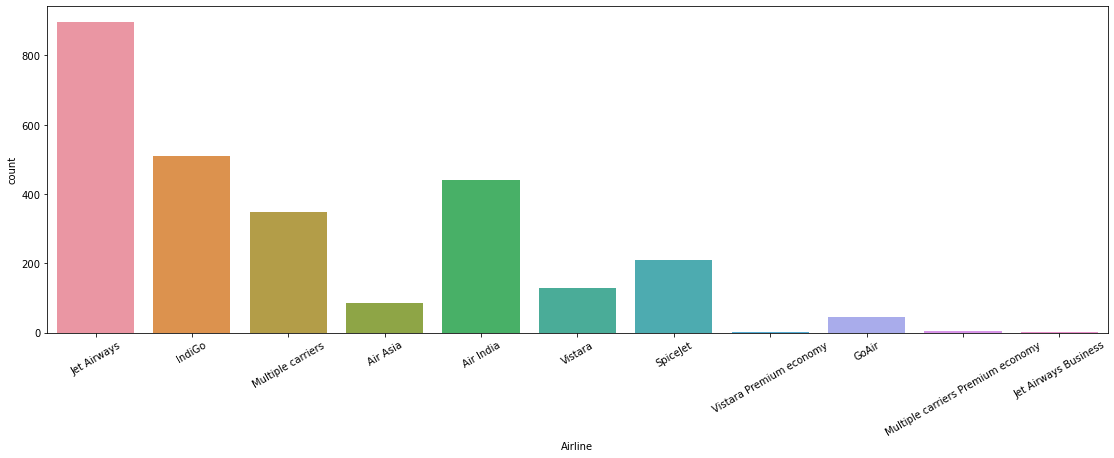

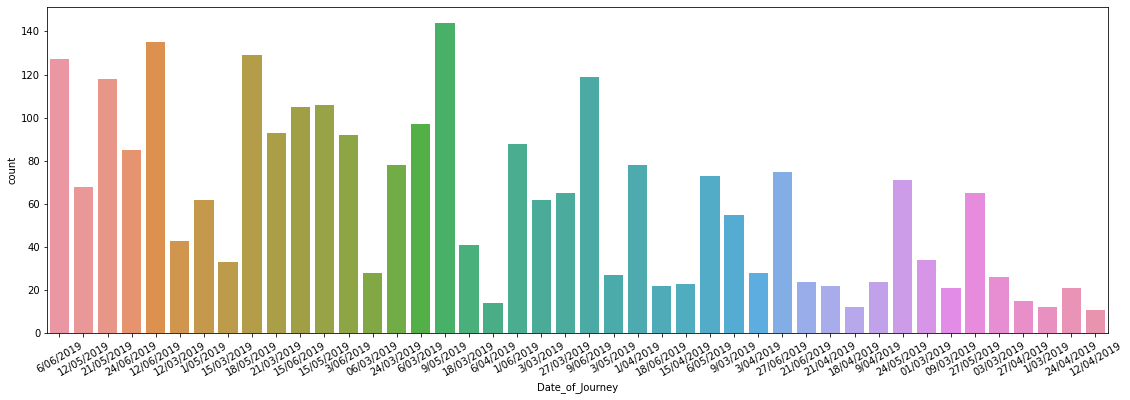

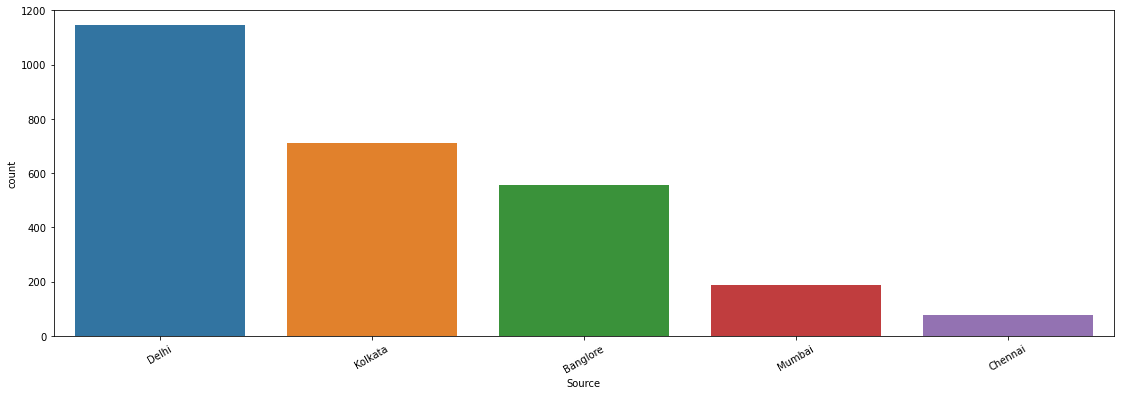

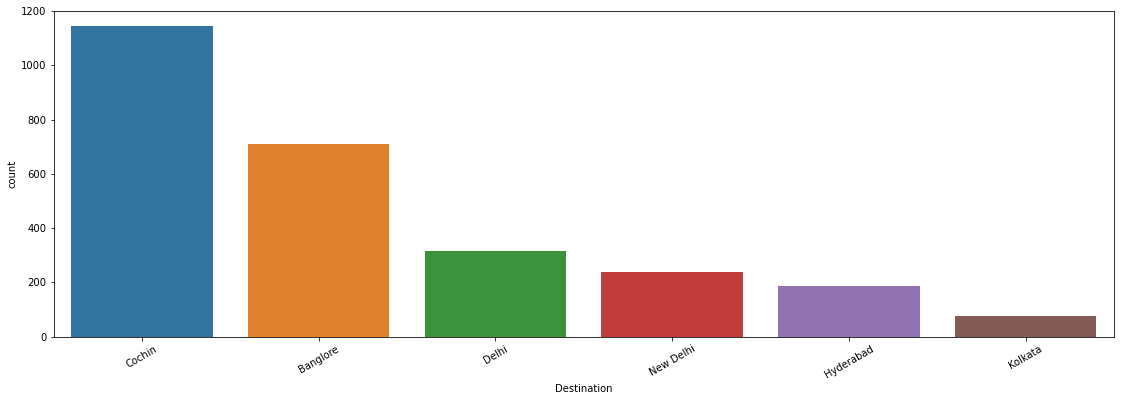

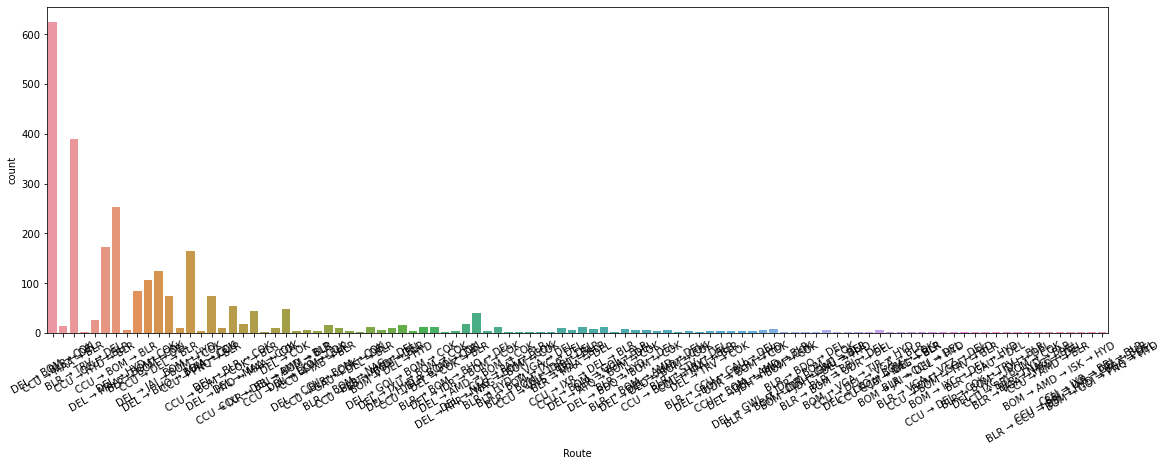

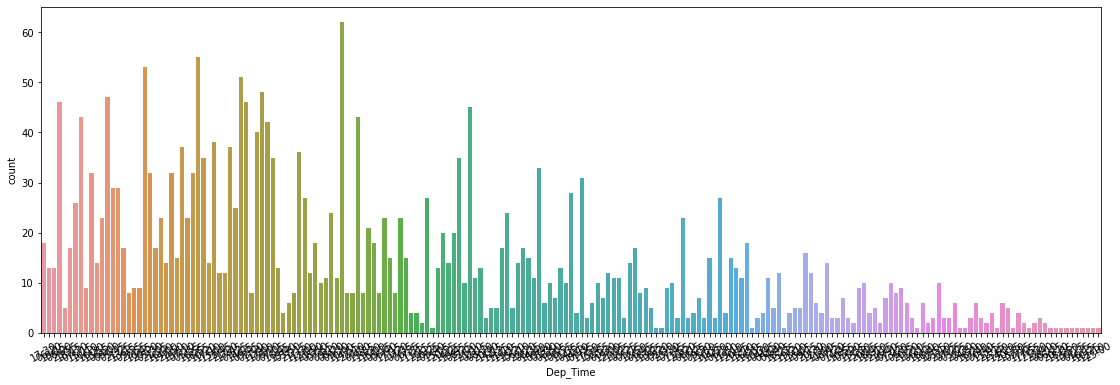

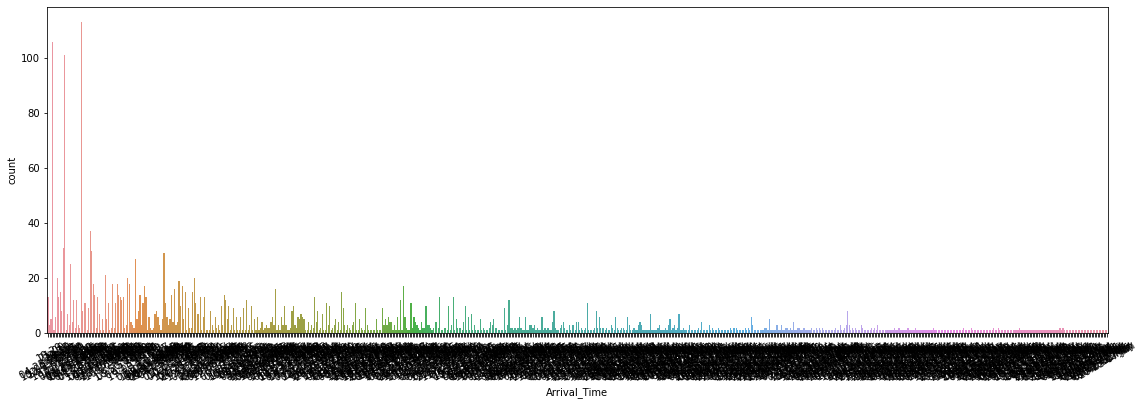

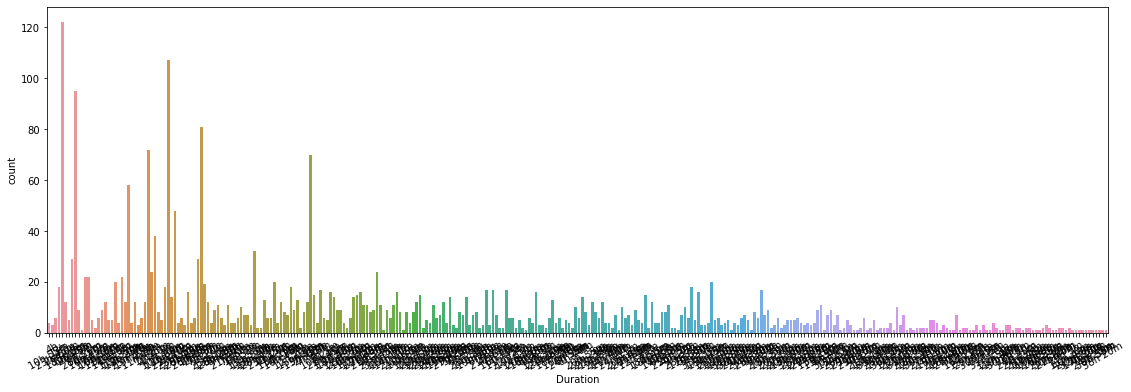

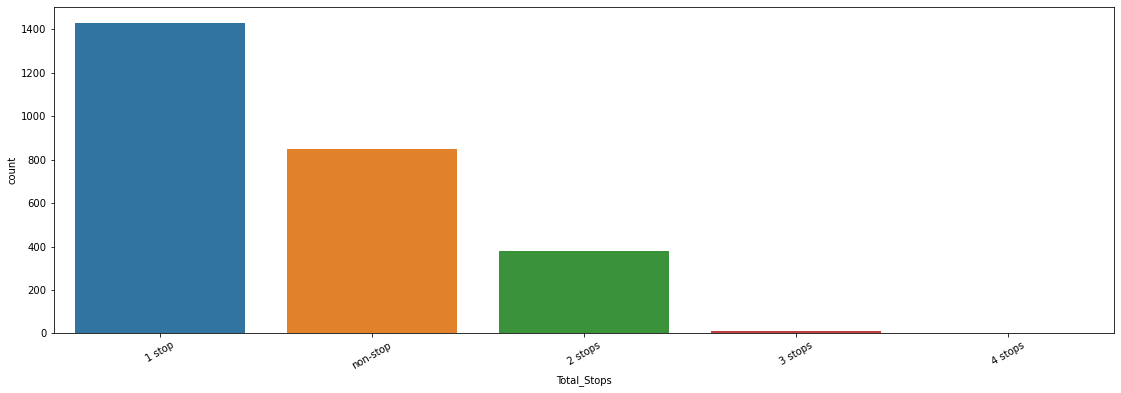

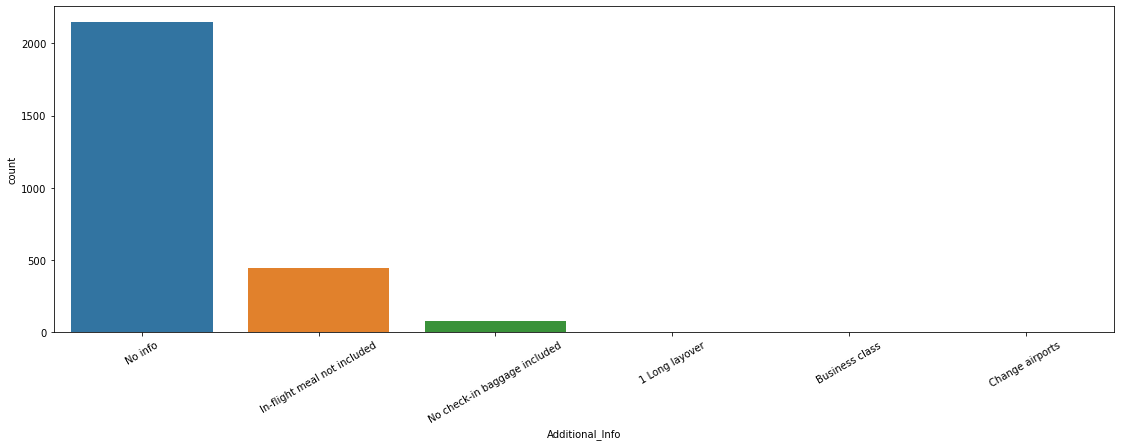

Printing boxplot for the columns


TypeError: no numeric data to plot

In [78]:
EDA(flight_test)

In [79]:
def new_col(X):
    X['Day_of_journey'] = pd.to_datetime(X['Date_of_Journey'], format="%d/%m/%Y").dt.day
    X['month_of_journey'] = pd.to_datetime(X["Date_of_Journey"], format="%d/%m/%Y").dt.month
    
    X['dep_time_hour'] = pd.to_datetime(X["Dep_Time"]).dt.hour
    X['dep_time_min'] = pd.to_datetime(X["Dep_Time"]).dt.minute
    
    X['arr_time_hour'] = pd.to_datetime(X["Arrival_Time"]).dt.hour
    X['arr_time_min'] = pd.to_datetime(X["Arrival_Time"]).dt.minute
    
    dura = list(X["Duration"])
    for i in range(len(dura)):
        if len(dura[i].split()) != 2:
            if "h" in dura[i]:
                dura[i] = dura[i].strip() + " 0m"
            else:
                dura[i] =  "0h " + dura[i]
                
     
    duration_hours = []
    duration_min= []
    for i in range(len(dura)):
        duration_hours.append(int(dura[i].split(sep='h')[0]))
        duration_min.append(int(dura[i].split(sep='m')[0].split()[-1]))

    X["Duration Hours"] = duration_hours
    X["Duration Minutes"] = duration_min
    
    X = X.drop('Date_of_Journey',axis=1)
    X = X.drop('Dep_Time',axis=1)
    X = X.drop('Arrival_Time',axis=1)
    X = X.drop('Duration',axis=1)

    airline = X["Airline"]
    airline = pd.get_dummies(airline,drop_first=True)

    destination = X[["Destination"]]
    destination = pd.get_dummies(destination,drop_first=True)

    source = X[["Source"]]
    source = pd.get_dummies(source,drop_first=True) 

Above function will convert and create new columns required in the dataset. 

In [80]:
new_col(flight_test)

In [81]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
flight_test['Total_Stops'] = label.fit_transform(flight_test['Total_Stops'])

We are usimng label encoder to convert the column here. 

In [82]:
flight_test = flight_test.drop('Airline',axis=1)
flight_test = flight_test.drop('Destination',axis=1)
flight_test = flight_test.drop('Source',axis=1)
flight_test = flight_test.drop('Route',axis=1)
flight_test = flight_test.drop('Additional_Info',axis=1)

Dropping columns not required

In [83]:
flight_data_test = pd.concat([flight_test,airline,source,destination],axis=1)

In [85]:
flight_data_test.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Day_of_journey,month_of_journey,dep_time_hour,dep_time_min,arr_time_hour,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,0.0,6.0,6.0,17.0,30.0,4.0,...,0,0,0,0,0,0,0,0,0,1
1,12/05/2019,06:20,10:20,4h,0.0,12.0,5.0,6.0,20.0,10.0,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,19:15,19:00 22 May,23h 45m,0.0,21.0,5.0,19.0,15.0,19.0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,08:00,21:00,13h,0.0,21.0,5.0,8.0,0.0,21.0,...,0,0,0,1,0,0,0,0,0,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,4.0,24.0,6.0,23.0,55.0,2.0,...,0,0,0,0,0,0,0,0,0,1


In [88]:
flight_data_test = flight_data_test.drop('Date_of_Journey',axis=1)
flight_data_test = flight_data_test.drop('Dep_Time',axis=1)
flight_data_test = flight_data_test.drop('Arrival_Time',axis=1)
flight_data_test = flight_data_test.drop('Duration',axis=1)

In [90]:
flight_data_test.columns

Index(['Total_Stops', 'Day_of_journey', 'month_of_journey', 'dep_time_hour',
       'dep_time_min', 'arr_time_hour', 'arr_time_min', 'Duration Hours',
       'Duration Minutes', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [92]:
flight_data_test.shape

(10683, 29)

In [ ]:
load_model = pickle.load(open('flight_price_prediction.pkl','rb'))
result = load_model.score(x,flight_data_test)